In [270]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [271]:
## Fonction qui convertit une image au format .png de resolution 30x30 et 
## retourne un tableau de 900 cases de tous les pixels de cette image
## l' extraction des pixels se fait avec matplotlib.image
## Si un pixel est blanc, le contenu de la case du tableau sera 1
## Si un pixel est noir, le contenu de la case du tableau sera 0

def load_img(name):
    img=mpimg.imread(name+'.png')
    t = np.zeros(900,dtype='f')
    k=0
    for i in range(30):
        for j in range(30):
            t[k]=img[i][j][0]
            k=k+1
    return t

In [272]:
## Fonction pour convertir 9 images de b et 9 images de g 
## et les mettre sur un tableau 

X=[]

def load_all_img():
    global X
    m=0
    for i in range(1,10):
        X.append(load_img('b'+str(i)))
        m=m+1
    for j in range(1,10):
        X.append(load_img('g'+str(j)))
        m=m+1
    return

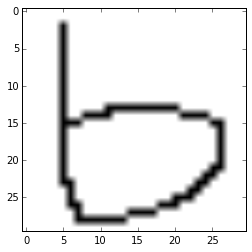

In [274]:
## Exemple de lettre b dessiné avec Paint au format .png

b1=mpimg.imread('b1'+'.png')
plt.imshow(b1)

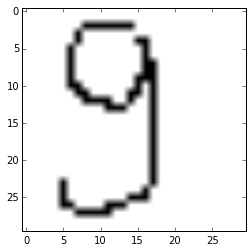

In [275]:
## Exemple de lettre g dessiné avec Paint au format .png

g1=mpimg.imread('g1'+'.png')
plt.imshow(g1)

In [243]:
load_all_img()

In [244]:
## Training Set (Matrice tab_X)

## Mettre tous les tableaux des lettre dans une matrice 
## Chaque ligne de la matrice constitue le contenu des 900 pixels d'une image 

tab_X=np.array([X[0],X[1],X[2],X[3],X[4],X[5],X[6],X[7],X[8],X[9],X[10],X[11],X[12],X[13],X[14],X[15],
                X[16],X[17]])

In [245]:
## Chaque case dans le tableau suivant refére à la lettre de chaque ligne du tableau du Training Set
## Si la lettre est b, on lui refére par un 0
## Si la lettre est g, on lui refére par un 1

tab_y=np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1])

In [246]:
## Dimension de la matrice tab_X 

tab_X.shape

(18L, 900L)

In [247]:
## Dimension du tableau tab_y

tab_y.shape

(18L,)

In [75]:
## Implémentation du réseau de neurones en utilisant Lasagne et nolearn

import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

In [250]:
## RESEAU DE NEURONES

net = NeuralNet(
        layers=[('input', layers.InputLayer),
                ('hidden', layers.DenseLayer),
                ('output', layers.DenseLayer),
                ],
        # Paramètres des couches:
        input_shape=(None, 30*30),
        hidden_num_units=100,  # Nombre de neurones dans la hidden layer
        output_nonlinearity=lasagne.nonlinearities.softmax,
        output_num_units=2,  # Nombre d'output, ici nous avons 2 (b et h)

        #optimization method:
        #update=nesterov_momentum,
        update_learning_rate=0.01,
        update_momentum=0.9,
         regression=False, 
        max_epochs=20,
        verbose=1,
        )

In [251]:
## Training the neural network

net.fit(tab_X,tab_y)

  input             	(None, 900)         	produces     900 outputs
  hidden            	(None, 100)         	produces     100 outputs
  output            	(None, 2)           	produces       2 outputs
  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       1.01393       3.86001      0.26268      0.50000  2.77s
      2       3.66651       0.64230      5.70844      0.50000  2.64s
      3       0.49213       0.57120      0.86156      1.00000  2.98s
      4       0.39599       0.52724      0.75105      1.00000  2.74s
      5       0.32241       0.49314      0.65379      1.00000  2.88s
      6       0.28568       0.45209      0.63191      1.00000  2.73s
      7       0.23716       0.40549      0.58488      1.00000  2.85s
      8       0.19915       0.37289      0.53406      1.00000  2.67s
      9       0.16237       0.33610      0.48312      1.00000  2.84s
     10       0.13484       0.30454      0

NeuralNet(X_tensor_type=<function matrix at 0x000000000A04D358>,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x000000001A8E45F8>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x000000001A8B7080>,
     custom_score=None, eval_size=0.2, hidden_num_units=100,
     input_shape=(None, 900),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=30, more_params={},
     objective=<class 'lasagne.objectives.Objective'>,
     objective_loss_function=<function categorical_crossentropy at 0x000000001A066B38>,
     on_epoch_finished=[<nolearn.lasagne.util.PrintLog instance at 0x00000000310420C8>],
     on_training_finished=[],
     output_nonlinearity=<function softmax at 0x000000001A4E0978>,
     output_num_units=2, regression=False,
     update=<function nesterov_momentum at 0x000000001A681518>

In [315]:
## TEST 
## On charge deux nouvelles images b10.png et g10.png et on essaie de les prédire

b11=load_img('b10')
g11=load_img('g10')

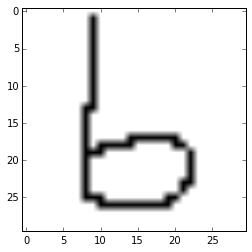

In [321]:
## Affichage de la lettre b qu'on veut prédire

b_test=mpimg.imread('b11'+'.png')
plt.imshow(b_test)

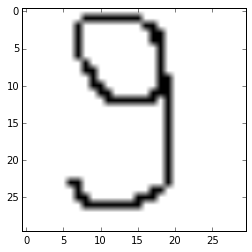

In [322]:
## Affichage de la lettre g qu'on veut prédire

g_test=mpimg.imread('g10'+'.png')
plt.imshow(g_test)

In [323]:
Xt, yt =np.array([b11,g11]) ,np.array([0,1]) ## On associe à chaque lettre un label 0 ou 1
b_test = Xt[0].reshape(Xt[0].shape[0],1)  ## Reshape du tableau pour que la fonction predict puisse le lire
g_test = Xt[1].reshape(Xt[1].shape[0],1)

In [324]:
## Fonction de prédiction
## Le label de la lettre b est 0
## le label de la lettre g est 1
## On configure le label d'abord reférant à chaque lettre
## Puis, on prédit avec le réseau de neurone avec la fonction net.predict()

def predict (lettre, label):
    if label==0:
        label = "lettre b"
    if label==1:
        label = "lettre g"
    if net.predict(lettre.T)[0]==0:  ## Si il prédit b
        predict ="lettre b"
    if net.predict(lettre.T)[0]==1:  ## Si il prédit g
        predict ="lettre g"
    
    print("Label: " + label)
    print("Predicted: " + predict)

In [325]:
## Resultat de la prédiction de b

predict(b_test,yt[0])

Label: lettre b
Predicted: lettre b


In [326]:
## Resultat de la prédiction de g

predict(g_test,yt[1])

Label: lettre g
Predicted: lettre g
